### 0828 과제
- 데이터셋 : auto_mpg.csv
- 목 적: 연비 예측
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : LinearRegression


In [170]:
# 데이터 준비
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [171]:
dataDF=pd.read_csv('auto_mpg.csv')

In [172]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [173]:
# object type 인 horsepower 결측값은 삭제!
dataDF['horsepower'].replace('?',np.nan,inplace=True)
dataDF['horsepower'].isna().sum()
dataDF.dropna(inplace=True)
dataDF['horsepower']=dataDF['horsepower'].astype('float64')

In [174]:
# 연비 단위 변환
dataDF['km/L']=dataDF['mpg']*0.425144

In [175]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
 9   km/L          392 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 33.7+ KB


In [176]:
dataDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,km/L
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,7.652592
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,6.377160
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,7.652592
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,6.802304
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,7.227448


In [177]:
# 피쳐와 타겟 분리
featureDF=dataDF[dataDF.columns[1:7]]
target=dataDF['km/L']
featureDF.head()

,cylinders,displacement,horsepower,weight,acceleration,model year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


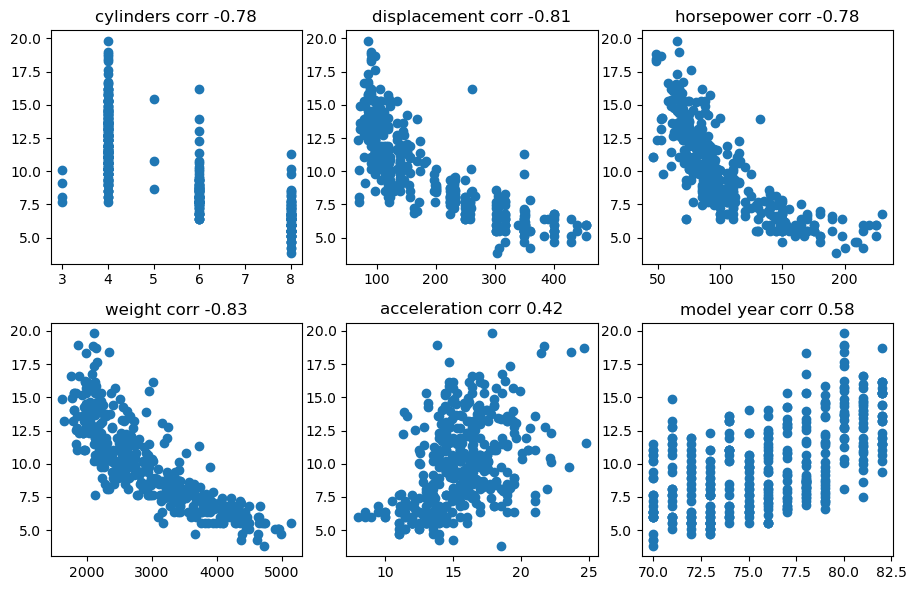

In [178]:
fig=plt.figure(figsize=(9,6))
ax=fig.subplots(2,3)

for i in range(6):
    x=i//3
    y=i%3
    ax[x,y].scatter(featureDF[featureDF.columns[i]],target)
    ax[x,y].set_title(f'{featureDF.columns[i]} corr {round(np.corrcoef(featureDF[featureDF.columns[i]],target)[0,1],2)}')
plt.tight_layout()
plt.show()

In [179]:
# 피쳐 결정
featureDF_select=featureDF[['weight','displacement','horsepower']]

In [180]:
# 트레이닝셋 테스트셋 분리
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(featureDF_select,target,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((294, 3), (98, 3), (294,), (98,))

In [181]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

In [182]:
scaler=MinMaxScaler()

In [183]:
scaler.fit(X_train)

MinMaxScaler()

In [184]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [185]:
# 선형 회귀
from sklearn.linear_model import LinearRegression

In [186]:
model=LinearRegression()

In [187]:
# 모델학습
model.fit(X_train_scaled,y_train)

LinearRegression()

In [188]:
# 모델 성능평가
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [189]:
pre_y=model.predict(X_test_scaled)
mse=mean_squared_error(y_test,pre_y)
rmse=mean_squared_error(y_test,pre_y)
mae=mean_absolute_error(y_test,pre_y)
score=model.score(X_test_scaled,y_test)

In [190]:
print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'mae : {mae}')
print(f' r2 , score : {score}')

mse : 3.4732572650231632
rmse : 3.4732572650231632
mae : 1.325966386449705
 r2 , score : 0.7305924852307123
